# Lecture 13:  Metropolis Algorithm 

**Overview:**
* Markov chain Monte Carlo.
* Metropolis algorithm.


**Next Lecture:**
* Ising model of ferromagnetism and Monte Carlo in stat mech.
---

In [ ]:
"""
integral(0 -> infinity): cos(x)e**-x dx = 1/2

choose w(x) = e**-x, integral(0 -> infinity): w(x) = 1

P(x) = e**-x

f(x)/w(x) = cos(x)
|P_y(y)dy| = |P_x(x)dx|

We want 
y = G(x) that takes 

P_x(x) to non-unigorm distribution P_y(y)

integral(): P_y(y)dy = integral(): dx

F(y) = integral(): P_y(y)dy
F(y) = x
then if  F^-1(y) exists, y = F^-1(x) = G(x)

P(y) = e**-y
F(y) = integral(0 -> infinity): e**-y dy
= e**-y

e**-y = x, y = -ln(x)

MONTE CARLO + STAT MECH
Micro canonical ensemble: MD
    fixed E,V,N

Canonical ensemble:
    fixed: T,V,N
We will study states labelled by i with energy E_i

In canonical ensemble
    P(E_i) = 1/Z e**(-BE_i), B = 1/(K_b)T
    Z = Sum(i): e**-BE_i

Statistical Averages.
<A> = Sum(i): AP(E_i)

In MC Method:
We choose N states at random
denoted by k = 1......N
<A> = (sum(k = 1 -> N): P(E_k)A_k) / sum(k = 1 -> N): P(E_k)

BF only has high prob for states with E_i ~ K_bT

Numerical problem
2 ** 19937 not close to 2** (10**23)

IMPORTANCE SAMPLING:
sample from distance favoring
states with E_i ~KbT

Define weighted average
<g> = integral(): w_i*g_i / integral(): w_i

choose:
g_i = A_iP(E_i)/w_i
<A_iP(E_i)/w_i>_w = <A>/w_i
<A> = <A_iP(E_i)/w_i>_w * sum(i): w_i
Select N sample states randomly from p_i = W_i/(sum(i): w_i)

So general weighted sum is
<g>_w ~ 1/N*(sum(k = i -> N): g_k)
<A> ~ 1/N*(sum(k = i -> N): A_kP(E_k)/w_k * sum(i):w_i)

Choose w_i so that most samples are in region E_i ~ K_bT
Simply choose w_i = P(E_i)
then sum(i): w_i = sum(i): P(E_i)) = 1
<A> ~ 1/N*sum(k = 1 -> N): A_k


How to choose states with P(E_i)?
We can do this wihtout knowing Z.
Use Markov-Chain!
Step through states one at a time
If at state i move to j by making small change.
Probability of moving to state j from i is gained by transition rate T_ij

T_o choose
T_ij, sum(i): T_ij = 1

Prob that state x_i is occupied increases
T_ij*P(x_i)
Also decrease
T_ij * P(x_j)

Total rate
partialP(x_j, t)/partialt = sum(u): T_ij P(x_i) - T_jiP(x_j)

in equilibrium

detailed balance
p(x_i)T_ij = p(x_j)T_ji

Most common choice Metropolis Sampling
T_ij = min[1, P(x_j)/P(x_i)]
choose delta to get ~ 1/3 ~1/2 acceptance rate

Algorith for generating samples from a PDF

1. Start at x:
2. Choose trial x_2 by sampling from a uniform random dist: x_f = x_i + f_i
                                                            -delta < f_i < delta
3. if W = P'(x_t)/P'(X) >= 1, then T = 1
    accept move: x_i+1 = x_t
4. if W < 1, generate a random # r
5. if r <= w, accept
    x_i+1 = x_trial
    accepting move with probability of w
6. reject 
    x_i+1 = x_i
7. Average quantities are simple arithmetic averages

For canonical dist
Metropolist
P_a = T_ij = {e**-B(E_j - E_i) E_j > E_i}
             {1               E_j < E_i }
"""

In [4]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

We will generate a Gaussian probability distribution from an un-normalized Gaussian. This may not be so impressive, but remember, we start from a random point that is not very likely to show up in the Gaussian distribution. This method can be used to generate more complex probability distributions from functions that may not be so easy to integrate.

* Try decreasing and/or increasing the sampling width. Note the change in the accepted fraction of points.
* How does the approximate distribution change for a very small (< 0.05) accepted fraction. Why does it change in this way?
* How does the approximate distribution change for a very large (> 0.95) accepted fraction. Why does it change in this way?

In [5]:
def gaussian(x):
    return np.exp(-x**2)

Accepted fraction: 0.4333
<x> =  0.002295569726462952
<x^2> =  0.5043680286080539


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


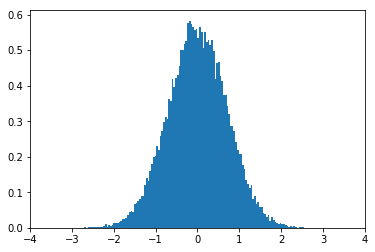

In [6]:
width = 5    # sampling width parameter
xList = [-10.0]    # some random starting point

numberOfSamples = 100000
xAccumulator = 0.0   # accuumlate for mean and standard deviation of accepted points
x2accumulator = 0.0
rejected  = 0.0  # count rejects 

np.random.seed(247)

for i in range(numberOfSamples):

    x = xList[-1]
    
    xTrial = x + width * (np.random.random() - 0.5)
    w = gaussian(xTrial) / gaussian(x)
    
    if w >= 1.0: # accept move
        xList.append(xTrial)
            
    else :
        r = np.random.random()
        
        if r <= w: # again accept move
            xList.append(xTrial)
                
        else : # reject move
            xList.append(x)   # keep current point for statistics
            rejected+=1
    
    xAccumulator += xList[-1]
    x2accumulator += xList[-1]**2
            
print("Accepted fraction: {:0.4f}".format((numberOfSamples-rejected)/numberOfSamples))
print("<x> = ", xAccumulator / numberOfSamples)
print("<x^2> = ", x2accumulator / numberOfSamples)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(xList, bins='auto', density=1)
ax.set_xlim([-4,4])
fig.show()

In [ ]:
"""
Thursday 3/21

E = (-J(sum <ij>): sig_i*sig_j) - uh(sum i):sig_i,  sig_i = +/-1

Thermal Average--> <sig_i> = tanh(BzJ<sig>)

Tanhs(x) = x - 1/3(x**3)

<sig> = BzJ(sig)- (BzJ<sig>)**3/3
1 = BzJ - 1/3(BzJ)**3<sig>**2
<sig>**2 = BzJ-a/(1/3BzJ)**3 = 3(T_c/T-1)/(T_c/T)**3 = 3T(T_c-T)
T_c = ZJ/K_b
B_c = 1/K_b*T_c = 1/ZJ

T > T_c --> sig = 0
T < T_c --> sig > 0
<sig> proportional to (T_c - T)**(1/2B)
MFT: B = 1/2
Onsague Solution: 1/8

Z = e^(Buh) + e^(-Buh)

Find roots of transcindental equation

<sig> = tanh(BzJ<sig>) = 0
<sig> = 0 for T > T_c = ZJ/K_b   MFT    (d=2, T_c ~ 2.35/k_b)

"Universal Physics" of 2nd order transitions: (1) Symmetry of order parameter Z_2

(2) Spatial Dimensional B. (d = 2)

C_ij = <sig_i*sig_j> - <sig_i><sig_j>
= <(sig_i-<sig_i>)*(sig_j-<sig_j>)>
= <sig_i*sig_j>-<<sig>*sig_i> - <<sig>*sig_j> + <<sig>*<sig>> - <sig>*<sig_i>
"""